In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.tsa.arima_model import ARIMA
from mapie.regression import MapieRegressor
from sklearn.linear_model import Ridge
from tsprial.forecasting import ForecastingChain

pd.plotting.register_matplotlib_converters()
plt.rc("figure", figsize=(20, 16))
plt.rc("font", size=10)

In [2]:
df = pd.read_csv('C:\\Repo_Pessoal\\Short-Term-Load-Forecasting\\PJME_hourly.csv')
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])
# df.set_index('ds',inplace=True)

# df.insert(0, 'unique_id', 'PJM_Load_hourly')
# df = df.sort_values(['unique_id', 'ds']).reset_index(drop=True)
df.head()

,ds,y
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


In [3]:
train_size = int(len(df.y)*2/3)
train_set = df[:train_size]
test_set = df[train_size:]

In [4]:
train_set.count()
test_set.count()

ds    48456
y     48456
dtype: int64

In [5]:
forecaster = ForecastingChain(
    Ridge(),
    n_estimators=len(train_set)-24,
    lags=range(1,24+1),
    use_exog=False,
)

forecaster.fit(None, train_set.y)

c:\Users\Cesar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.90489e-09): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
c:\Users\Cesar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
c:\Users\Cesar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=6.75106e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
c:\Users\Cesar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=7.45767e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)

ForecastingChain(estimator=Ridge(), lags=range(1, 25), n_estimators=96886)

In [6]:
model = MapieRegressor(
    forecaster, cv="prefit",
).fit(train_set.ds, train_set.y)

In [7]:
forecaster.fit(None, train_set.y)
model.single_estimator_ = forecaster

c:\Users\Cesar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.90489e-09): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
c:\Users\Cesar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
c:\Users\Cesar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=6.75106e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
c:\Users\Cesar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=7.45767e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)

In [10]:
print(forecaster)

ForecastingChain(estimator=Ridge(), lags=range(1, 25), n_estimators=96886)


In [8]:
forecasts = model.predict(test_set.y, alpha=0.05)

MemoryError: Unable to allocate 35.0 GiB for an array with shape (48456, 96910) and data type float64

In [7]:
sf.fitted_[0, 0].model_

,data,trend,seasonal,remainder
0,30393.0,31363.242892,-3774.640817,2804.397925
1,29265.0,31371.639833,-4729.611885,2622.972052
2,28357.0,31381.273355,-5159.147894,2134.874540
3,27899.0,31392.171479,-5272.817301,1779.645821
4,28057.0,31404.297352,-4838.708862,1491.411510
...,...,...,...,...
145361,44057.0,39772.960518,5277.703677,-993.664195
145362,43256.0,39766.102603,4330.929952,-841.032556
145363,41552.0,39759.387357,2807.548089,-1014.935447
145364,38500.0,39752.771913,-102.296691,-1150.475222


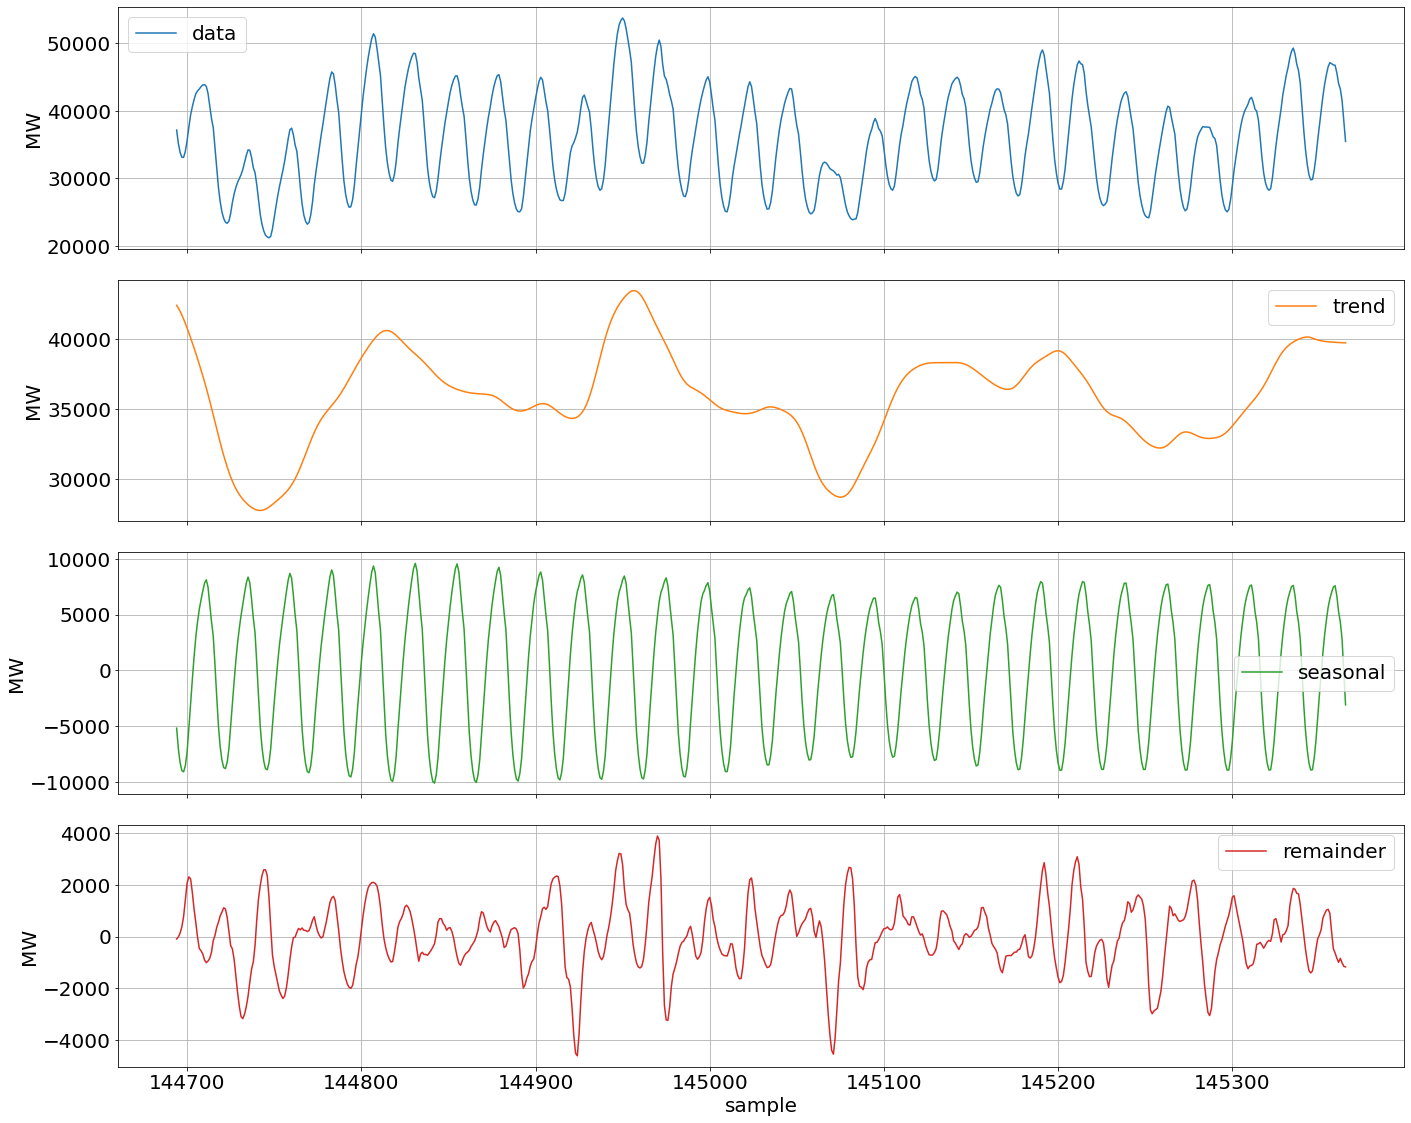

In [23]:
plt.rc("figure", figsize=(20, 16))
plt.rc("font", size=20)
sf.fitted_[0, 0].model_.tail(24 * 28).plot(subplots=True, grid=True,xlabel='sample',ylabel='MW')
plt.tight_layout()
plt.show()

In [14]:
forecasts = sf.predict(h=31, level=[90])
forecasts.head()

,ds,MSTL,MSTL-lo-90,MSTL-hi-90
unique_id,,,,
PJM_Load_hourly,2018-08-03 01:00:00,32383.949219,32097.798828,32670.099609
PJM_Load_hourly,2018-08-03 02:00:00,30601.000000,30010.136719,31191.861328
PJM_Load_hourly,2018-08-03 03:00:00,29335.716797,28449.982422,30221.453125
PJM_Load_hourly,2018-08-03 04:00:00,28643.541016,27492.214844,29794.867188
PJM_Load_hourly,2018-08-03 05:00:00,28747.849609,27362.378906,30133.320312


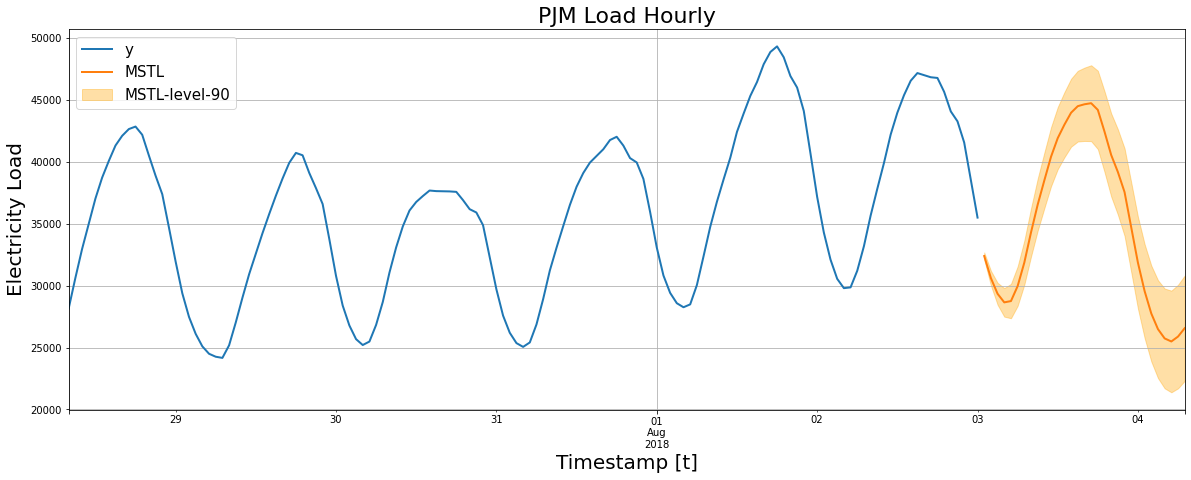

In [15]:
_, ax = plt.subplots(1, 1, figsize = (20, 7))
df_plot = pd.concat([df, forecasts]).set_index('ds').tail(24 * 7)
df_plot[['y', 'MSTL']].plot(ax=ax, linewidth=2)
ax.fill_between(df_plot.index, 
                df_plot['MSTL-lo-90'], 
                df_plot['MSTL-hi-90'],
                alpha=.35,
                color='orange',
                label='MSTL-level-90')
ax.set_title('PJM Load Hourly', fontsize=22)
ax.set_ylabel('Electricity Load', fontsize=20)
ax.set_xlabel('Timestamp [t]', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()